In [1]:
# import visualisation libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


  

In [2]:
songs_data = pd.read_csv("../data/songs_data.csv")
songs_data

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6ho0GyrWZN3mhi9zVRW7xi,Losing It,FISHER,79,edm,0.760,0.964,2,-5.844,1,0.0576,0.001820,0.700000,0.0974,0.6410,125.000,248036
1,4bYJKHG6KLdGzHQRJMaFc8,Rock And Roll All Nite,KISS,3,rock,0.581,0.831,1,-8.045,1,0.1070,0.045800,0.000000,0.0782,0.8850,144.684,168160
2,1VGlMYqPO1LHyclvfIMvWI,Snälla bli min (Hjalm Remix),Robin Lukovic,0,edm,0.661,0.760,8,-4.769,1,0.0268,0.000406,0.040700,0.6110,0.4390,99.993,271238
3,6BbINUfGabVyiNFJpQXn3x,Wicked,Future,62,rap,0.718,0.679,11,-5.899,0,0.0706,0.001910,0.010400,0.3850,0.2050,157.970,173347
4,1Ly0ssAgeM7YqdHptao8Oe,Paranoid,Black Sabbath,15,rock,0.426,0.619,4,-11.501,0,0.0722,0.000084,0.002390,0.1700,0.3820,162.721,168440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28391,639L1OUV4JRqnPHaQaziYO,Black Water,Massface,35,rock,0.253,0.931,11,-3.093,1,0.0616,0.000595,0.002170,0.0978,0.3320,194.911,208077
28392,4bQGI1roeSr8Q85on2tQNU,Lean On Me,Club Nouveau,2,r&b,0.748,0.629,0,-8.420,1,0.0660,0.016800,0.000000,0.0991,0.9190,182.448,294947
28393,32gaGfRgDMrMtcpCqF078U,Morning Dew,Matt Quentin,58,pop,0.686,0.332,9,-11.759,1,0.0454,0.890000,0.342000,0.1070,0.0745,80.994,237037
28394,7At7pljkrkgjwy0utWu2xx,eoh (Theis EZ Remix),Hallasen,33,edm,0.845,0.505,10,-5.481,1,0.0516,0.057500,0.000424,0.0335,0.2050,125.037,143095


In [3]:
# shape of the data
songs_data.shape

(28396, 17)

In [4]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28396 entries, 0 to 28395
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          28396 non-null  object 
 1   track_name        28392 non-null  object 
 2   track_artist      28392 non-null  object 
 3   track_popularity  28396 non-null  int64  
 4   genre             28396 non-null  object 
 5   danceability      28396 non-null  float64
 6   energy            28396 non-null  float64
 7   key               28396 non-null  int64  
 8   loudness          28396 non-null  float64
 9   mode              28396 non-null  int64  
 10  speechiness       28396 non-null  float64
 11  acousticness      28396 non-null  float64
 12  instrumentalness  28396 non-null  float64
 13  liveness          28396 non-null  float64
 14  valence           28396 non-null  float64
 15  tempo             28396 non-null  float64
 16  duration_ms       28396 non-null  int64 

In [5]:
# identify missing data
songs_data.isnull().sum()

track_id            0
track_name          4
track_artist        4
track_popularity    0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [6]:
songs_data[songs_data.track_artist.isnull()]

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16265,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
16995,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
25483,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,rap,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
27825,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,latin,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773


In [7]:
songs_data[songs_data.track_name.isnull()]

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16265,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
16995,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
25483,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,rap,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
27825,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,latin,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773


In [8]:
# summary statistics for all the data

songs_data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000,28396.000000
mean,39.336104,0.653386,0.698387,5.368256,-6.817541,0.565397,0.107990,0.177263,0.091143,0.190986,0.510434,120.955390,226575.367094
std,23.706486,0.145799,0.183484,3.613898,3.036443,0.495714,0.102623,0.222908,0.232566,0.156015,0.234309,26.957635,61076.581384
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309000,0.000000,0.041000,0.014400,0.000000,0.092600,0.329000,99.972000,187766.500000
50%,42.000000,0.670000,0.722000,6.000000,-6.262000,1.000000,0.062700,0.079700,0.000021,0.127000,0.512000,121.993000,216921.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.708750,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999500,254965.500000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [9]:
# plot a boxplot
# sns.boxplot(x=songs_data.loudness)
# plt.title("Boxplot for loudness");

In [10]:
# drop columns with missing data

songs_data_cleaned = songs_data.dropna(inplace=False)

In [11]:
# identify duplicates
# the data set has no duplicated data

# songs_data[songs_data.duplicated(keep=False)]

In [12]:
# check if the data has any duplicates

songs_data_cleaned[songs_data_cleaned.duplicated(keep=False)]

# this shows two rows that are duplicated

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1033,2CZFVWvkIatZGqHJ9IcpzE,Parachute,NSTASIA,37,r&b,0.814,0.4810,5,-6.448,0,0.1010,0.53000,0.000006,0.1290,0.573,119.008,188962
1326,4suDPyEfKYtqDR2OGblbTi,9と4分の3番線で君を待つ (Run Away) - Japanese Ver.,TOMORROW X TOGETHER,48,pop,0.630,0.7870,1,-4.302,1,0.1030,0.00489,0.000000,0.1340,0.466,128.997,211867
1483,6GbWNeR3P9MTCmSyPVHgb1,Taste,Rhye,58,pop,0.768,0.4290,1,-9.401,1,0.0955,0.87500,0.419000,0.1150,0.415,104.026,225600
1546,1BINQwBuKPKhpDyXipBXLl,Fly By Night,Rush,0,rock,0.495,0.7790,7,-6.678,1,0.0706,0.04570,0.000200,0.0813,0.545,139.076,201413
1744,5ceEaDSTtQR6HQ9yfEB6Sj,Yamamoto - KMN Street EP,Noah,40,rap,0.781,0.7050,7,-4.821,0,0.0974,0.37700,0.000000,0.1640,0.276,93.973,188936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27122,7DuLZ8HdkbJsFSIBJTYV9U,Grasshopper,Agnes Obel,35,pop,0.734,0.0772,2,-19.600,1,0.0544,0.84600,0.950000,0.0905,0.159,120.070,158360
27380,35rnikz5NAOTvdc4gYzJFN,Sieben,Subway To Sally,41,pop,0.453,0.9860,9,-1.853,0,0.1140,0.00354,0.000000,0.1770,0.284,161.928,206289
27911,2lWfuwRnN6aSk50TPx6eCk,If The World,Guns N' Roses,2,rock,0.645,0.7400,7,-9.414,1,0.0528,0.00542,0.023900,0.1150,0.783,146.434,293507
28132,4lqEFIB9YZl8BwR99L5H3b,In My Room (feat. Ty Dolla $ign & Tyga),Mustard,61,rap,0.745,0.8690,6,-4.375,1,0.0444,0.00193,0.000000,0.0799,0.814,104.015,168641


In [13]:
# going to drop the first appearance of duplicated data

print("shape of data after dropping with the duplicates:", songs_data_cleaned.shape)

# songs_data_cleaned = songs_data_cleaned[~songs_data_cleaned.duplicated()]

print("shape of data before dropping one of the duplictaes:", songs_data.shape)
# we dropped one row of data

shape of data after dropping with the duplicates: (28392, 17)
shape of data before dropping one of the duplictaes: (28396, 17)


In [14]:
# identifying correlations between variables
# ranges between 1 and -1. The closer to 1/-1 the stronger the correlation.

# corr = songs_data.corr()
# corr

In [15]:
# # visualise the correlations

# plt.rcParams["figure.figsize"] = (10,5)
# sns.heatmap(corr, cmap="Blues", annot = True);

In [16]:
songs_data_cleaned.genre.unique()

array(['edm', 'rock', 'rap', 'latin', 'r&b', 'pop'], dtype=object)

In [17]:
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

songs_data_cleaned['genre_encode']= label_encoder.fit_transform(songs_data_cleaned['genre'])
  
songs_data_cleaned['genre_encode'].unique()

C:\Users\ericy\AppData\Local\Temp\ipykernel_4908\3407670296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_data_cleaned['genre_encode']= label_encoder.fit_transform(songs_data_cleaned['genre'])


array([0, 5, 4, 1, 3, 2])

In [18]:

songs_data_cleaned

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_encode
0,6ho0GyrWZN3mhi9zVRW7xi,Losing It,FISHER,79,edm,0.760,0.964,2,-5.844,1,0.0576,0.001820,0.700000,0.0974,0.6410,125.000,248036,0
1,4bYJKHG6KLdGzHQRJMaFc8,Rock And Roll All Nite,KISS,3,rock,0.581,0.831,1,-8.045,1,0.1070,0.045800,0.000000,0.0782,0.8850,144.684,168160,5
2,1VGlMYqPO1LHyclvfIMvWI,Snälla bli min (Hjalm Remix),Robin Lukovic,0,edm,0.661,0.760,8,-4.769,1,0.0268,0.000406,0.040700,0.6110,0.4390,99.993,271238,0
3,6BbINUfGabVyiNFJpQXn3x,Wicked,Future,62,rap,0.718,0.679,11,-5.899,0,0.0706,0.001910,0.010400,0.3850,0.2050,157.970,173347,4
4,1Ly0ssAgeM7YqdHptao8Oe,Paranoid,Black Sabbath,15,rock,0.426,0.619,4,-11.501,0,0.0722,0.000084,0.002390,0.1700,0.3820,162.721,168440,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28391,639L1OUV4JRqnPHaQaziYO,Black Water,Massface,35,rock,0.253,0.931,11,-3.093,1,0.0616,0.000595,0.002170,0.0978,0.3320,194.911,208077,5
28392,4bQGI1roeSr8Q85on2tQNU,Lean On Me,Club Nouveau,2,r&b,0.748,0.629,0,-8.420,1,0.0660,0.016800,0.000000,0.0991,0.9190,182.448,294947,3
28393,32gaGfRgDMrMtcpCqF078U,Morning Dew,Matt Quentin,58,pop,0.686,0.332,9,-11.759,1,0.0454,0.890000,0.342000,0.1070,0.0745,80.994,237037,2
28394,7At7pljkrkgjwy0utWu2xx,eoh (Theis EZ Remix),Hallasen,33,edm,0.845,0.505,10,-5.481,1,0.0516,0.057500,0.000424,0.0335,0.2050,125.037,143095,0


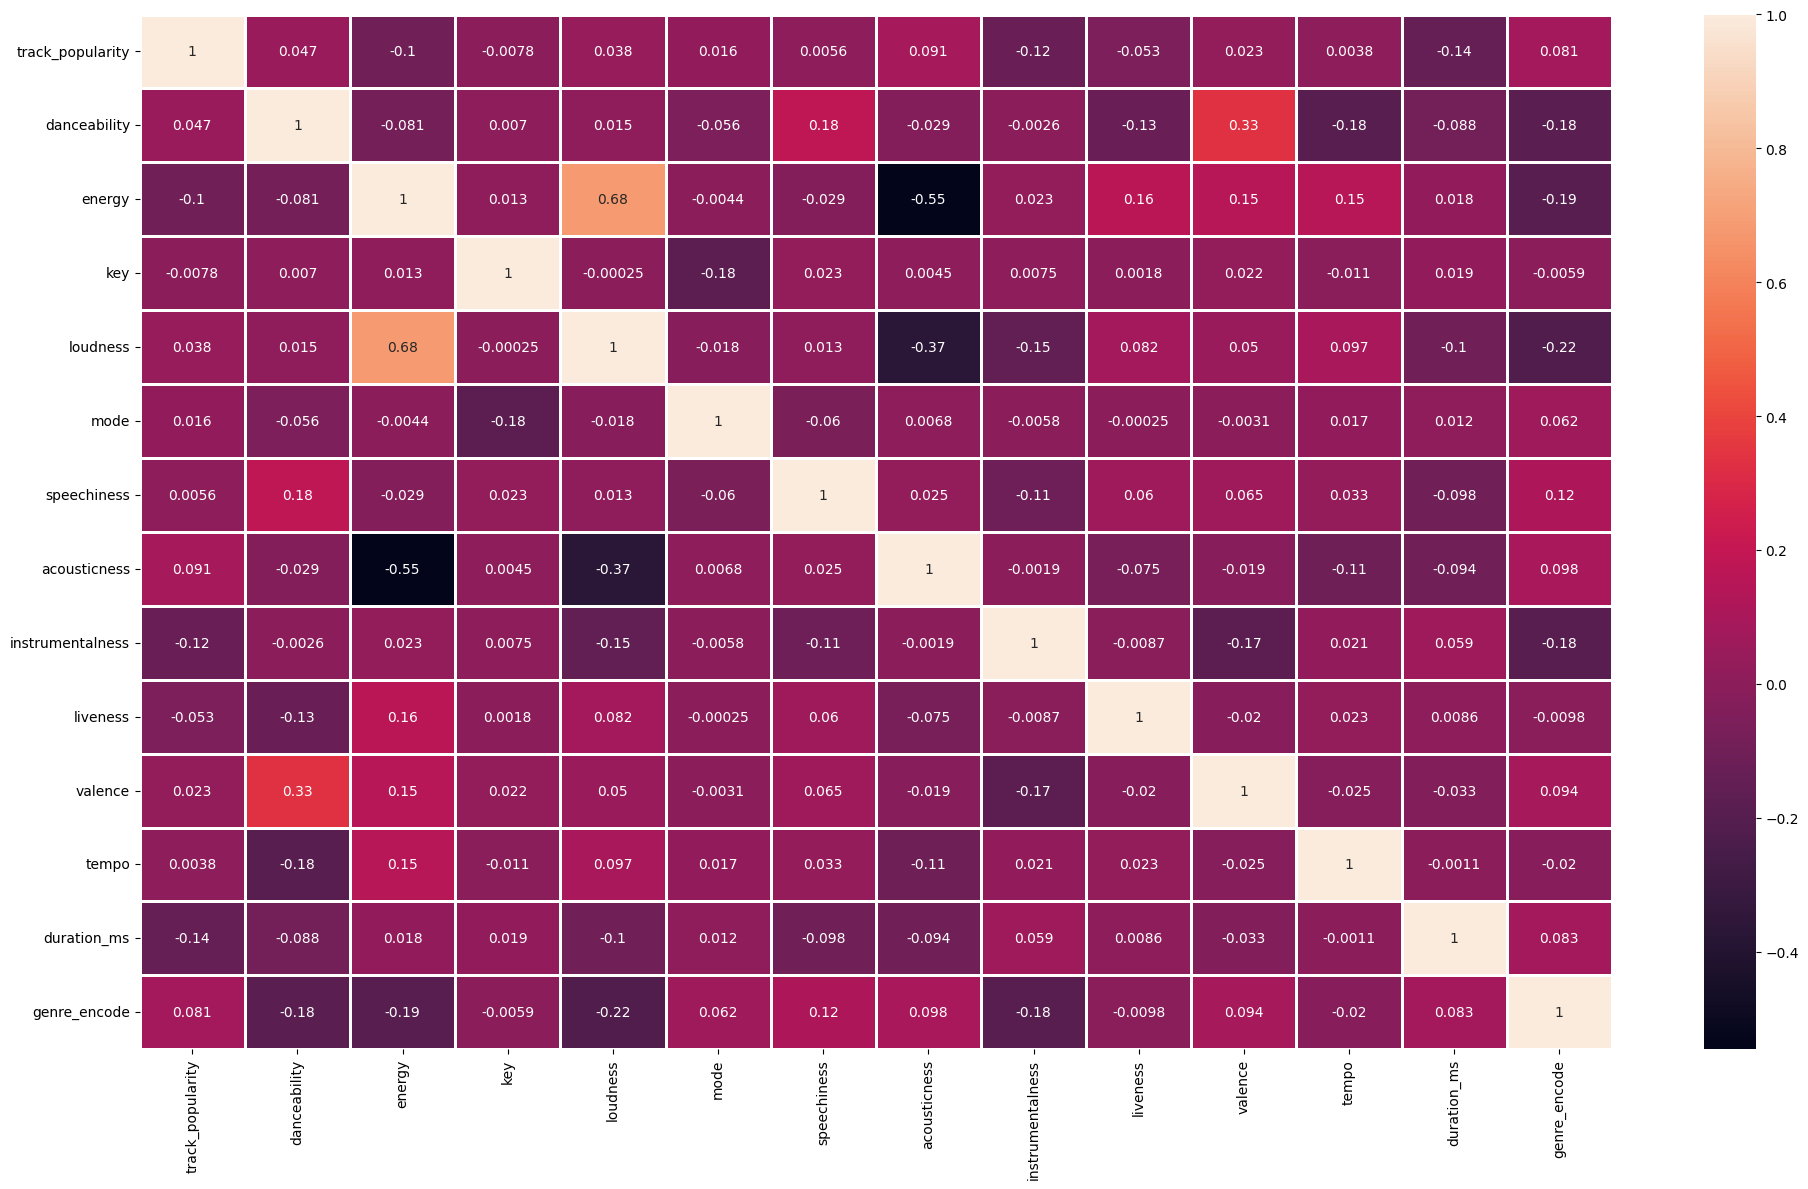

In [19]:
df=songs_data_cleaned
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True),annot=True, linewidth=2)
plt.tight_layout()

In [20]:
df_cleaned = df.copy()

df_cleaned.drop(['key','mode','liveness','tempo'], axis = 1)

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,duration_ms,genre_encode
0,6ho0GyrWZN3mhi9zVRW7xi,Losing It,FISHER,79,edm,0.760,0.964,-5.844,0.0576,0.001820,0.700000,0.6410,248036,0
1,4bYJKHG6KLdGzHQRJMaFc8,Rock And Roll All Nite,KISS,3,rock,0.581,0.831,-8.045,0.1070,0.045800,0.000000,0.8850,168160,5
2,1VGlMYqPO1LHyclvfIMvWI,Snälla bli min (Hjalm Remix),Robin Lukovic,0,edm,0.661,0.760,-4.769,0.0268,0.000406,0.040700,0.4390,271238,0
3,6BbINUfGabVyiNFJpQXn3x,Wicked,Future,62,rap,0.718,0.679,-5.899,0.0706,0.001910,0.010400,0.2050,173347,4
4,1Ly0ssAgeM7YqdHptao8Oe,Paranoid,Black Sabbath,15,rock,0.426,0.619,-11.501,0.0722,0.000084,0.002390,0.3820,168440,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28391,639L1OUV4JRqnPHaQaziYO,Black Water,Massface,35,rock,0.253,0.931,-3.093,0.0616,0.000595,0.002170,0.3320,208077,5
28392,4bQGI1roeSr8Q85on2tQNU,Lean On Me,Club Nouveau,2,r&b,0.748,0.629,-8.420,0.0660,0.016800,0.000000,0.9190,294947,3
28393,32gaGfRgDMrMtcpCqF078U,Morning Dew,Matt Quentin,58,pop,0.686,0.332,-11.759,0.0454,0.890000,0.342000,0.0745,237037,2
28394,7At7pljkrkgjwy0utWu2xx,eoh (Theis EZ Remix),Hallasen,33,edm,0.845,0.505,-5.481,0.0516,0.057500,0.000424,0.2050,143095,0


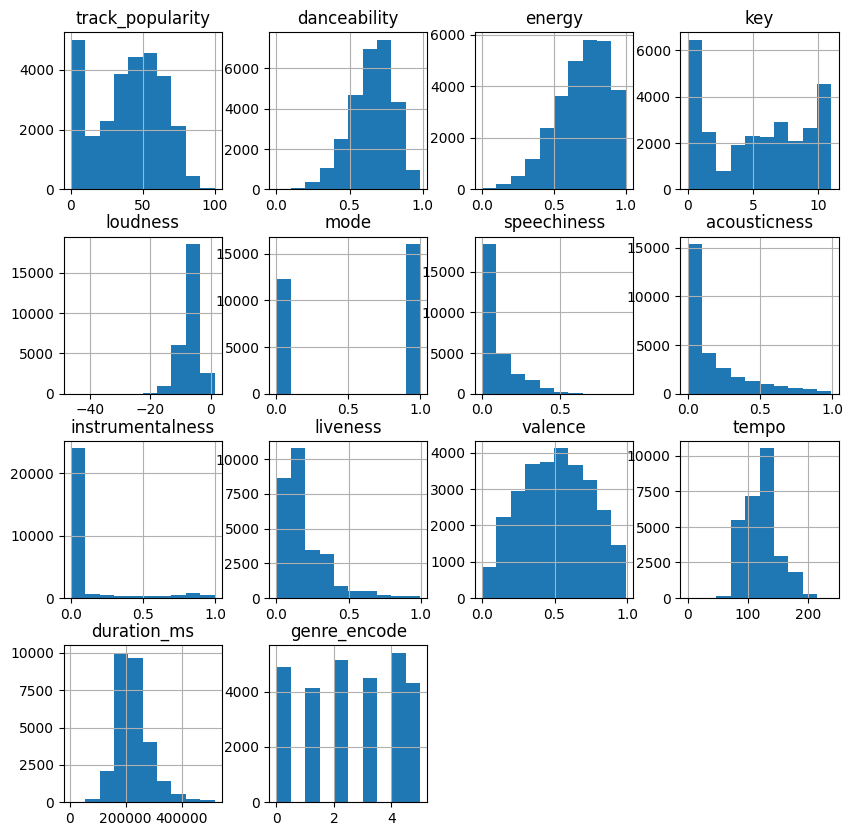

In [21]:
df_cleaned.hist(figsize=(10, 10));

In [22]:
# define our feature and target
target = df_cleaned.genre_encode
features = df_cleaned.drop(['genre','genre_encode','track_id','track_name','track_artist'], axis = 1)

In [23]:
scaler = MinMaxScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

features_scaled

array([[0.79      , 0.77314344, 0.9639937 , ..., 0.64682139, 0.52205145,
        0.47495378],
       [0.03      , 0.59104781, 0.83097042, ..., 0.89303734, 0.60425994,
        0.31949553],
       [0.        , 0.67243133, 0.75995799, ..., 0.44298688, 0.41761193,
        0.52011055],
       ...,
       [0.58      , 0.69786368, 0.33188308, ..., 0.07517659, 0.33826428,
        0.45354703],
       [0.33      , 0.85961343, 0.50491336, ..., 0.20686176, 0.52220598,
        0.27071291],
       [0.72      , 0.68769074, 0.58192684, ..., 0.45105954, 0.51792516,
        0.37098928]])

In [24]:
#q1 and q3
# if we had no missing values we could use np.percentile

q1 = np.nanpercentile(df_cleaned.energy, 25)
q3 = np.nanpercentile(df_cleaned.energy, 75)

print("25th percentie:", q1)
print("75th percentie:", q3)

25th percentie: 0.579
75th percentie: 0.843


In [25]:
iqr = q3 - q1
UB = q3 + 1.5*iqr
LB = q1 - 1.5*iqr

print("Values above", UB, "and values below", LB, "are outliers")

Values above 1.2389999999999999 and values below 0.18299999999999994 are outliers


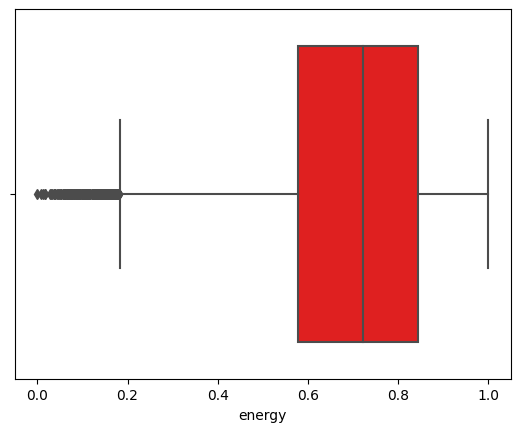

In [26]:
# plot a boxplot for a numerical column

sns.boxplot(x = df_cleaned.energy, color = 'red');

In [27]:

# subsetting the data frame where total amount usd is greater than UB and less than LB

df_cleaned[(df_cleaned.energy > UB) |
          (df_cleaned.energy < LB)]

,track_id,track_name,track_artist,track_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_encode
8,4jZ9KCpaHeTUfnOd2pd8sY,Go to Sleep Little Baby,Niykee Heaton,47,pop,0.550,0.1820,10,-12.543,1,0.0306,0.72000,0.000000,0.1650,0.369,94.806,164153,2
193,5Jm9dU50Rpzz5Yao9ynzQs,yellow chords,jhfly,54,rap,0.561,0.0644,7,-13.783,0,0.4810,0.19700,0.884000,0.0932,0.960,130.583,76835,4
333,6eP7ORSpvpgbbUt5aUUMIX,Mosaic - Skit,Psalm Trees,49,rap,0.772,0.0383,10,-16.941,0,0.4850,0.68500,0.731000,0.1120,0.961,89.058,64719,4
345,2LMkwUfqC6S6s6qDVlEuzV,White Ferrari,Frank Ocean,71,r&b,0.444,0.0924,0,-15.605,1,0.0366,0.78400,0.000000,0.3040,0.219,108.917,248808,3
525,6CcJMwBtXByIz4zQLzFkKc,i love you,Billie Eilish,85,r&b,0.421,0.1310,0,-18.435,1,0.0382,0.95200,0.004530,0.1090,0.120,137.446,291796,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27856,7gcVX05HnwUIHev1pkh0ne,Quicky,Fractite,31,rap,0.740,0.1230,8,-10.878,0,0.0734,0.00163,0.808000,0.0827,0.205,90.988,79121,4
27858,0yonyImAyAHooQ12SxdHaU,Ready For Love,India.Arie,25,r&b,0.549,0.1430,4,-12.793,0,0.0296,0.81000,0.000074,0.1120,0.189,121.871,268800,3
28013,6KXr7yY6zDuNCwXfhY2HvQ,Black Crow - Acoustic,Louis Baker,42,r&b,0.761,0.1530,7,-10.906,0,0.0405,0.89300,0.000000,0.1160,0.332,112.783,194444,3
28042,3Wc9aWJgP6ST2gKqaPUzq9,97,Bertholet,48,rap,0.645,0.1650,3,-19.347,0,0.1640,0.22300,0.803000,0.1640,0.843,80.367,121891,4


In [28]:
# number of outliers 

df_cleaned[(df_cleaned.energy > UB) | (df_cleaned.energy < LB)].shape[0]

223

In [29]:
lista=['track_popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre_encode']
for column in lista:
    q1 = np.nanpercentile(df_cleaned[column], 25)
    q3 = np.nanpercentile(df_cleaned[column], 75)
    print("Column:", column)
    print("25th percentile:", q1)
    print("75th percentile:", q3)
    print()  # Adding an empty line for readability

Column: track_popularity
25th percentile: 21.0
75th percentile: 58.0

Column: danceability
25th percentile: 0.561
75th percentile: 0.76

Column: energy
25th percentile: 0.579
75th percentile: 0.843

Column: key
25th percentile: 2.0
75th percentile: 9.0

Column: loudness
25th percentile: -8.309
75th percentile: -4.70775

Column: mode
25th percentile: 0.0
75th percentile: 1.0

Column: speechiness
25th percentile: 0.041
75th percentile: 0.133

Column: acousticness
25th percentile: 0.014374999999999999
75th percentile: 0.26

Column: instrumentalness
25th percentile: 0.0
75th percentile: 0.0065825

Column: liveness
25th percentile: 0.0926
75th percentile: 0.249

Column: valence
25th percentile: 0.329
75th percentile: 0.695

Column: tempo
25th percentile: 99.972
75th percentile: 133.9995

Column: duration_ms
25th percentile: 187746.5
75th percentile: 254965.5

Column: genre_encode
25th percentile: 1.0
75th percentile: 4.0



In [30]:
df_cleaned.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre_encode'],
      dtype='object')

In [31]:
for column in lista:
    q1 = np.nanpercentile(df_cleaned[column], 25)
    q3 = np.nanpercentile(df_cleaned[column], 75)
    
    iqr = q3 - q1
    UB = q3 + 1.5 * iqr
    LB = q1 - 1.5 * iqr
    
    print("Column:", column)
    print("25th percentile:", q1)
    print("75th percentile:", q3)
    print("IQR:", iqr)
    print("Upper Bound (UB):", UB)
    print("Lower Bound (LB):", LB)
    print("Values above", UB, "and values below", LB, "are outliers")
    print()  # Adding an empty line for readability

Column: track_popularity
25th percentile: 21.0
75th percentile: 58.0
IQR: 37.0
Upper Bound (UB): 113.5
Lower Bound (LB): -34.5
Values above 113.5 and values below -34.5 are outliers

Column: danceability
25th percentile: 0.561
75th percentile: 0.76
IQR: 0.19899999999999995
Upper Bound (UB): 1.0585
Lower Bound (LB): 0.2625000000000001
Values above 1.0585 and values below 0.2625000000000001 are outliers

Column: energy
25th percentile: 0.579
75th percentile: 0.843
IQR: 0.264
Upper Bound (UB): 1.2389999999999999
Lower Bound (LB): 0.18299999999999994
Values above 1.2389999999999999 and values below 0.18299999999999994 are outliers

Column: key
25th percentile: 2.0
75th percentile: 9.0
IQR: 7.0
Upper Bound (UB): 19.5
Lower Bound (LB): -8.5
Values above 19.5 and values below -8.5 are outliers

Column: loudness
25th percentile: -8.309
75th percentile: -4.70775
IQR: 3.6012499999999994
Upper Bound (UB): 0.6941249999999988
Lower Bound (LB): -13.710874999999998
Values above 0.6941249999999988 and

In [32]:
for column in lista:
    q1 = np.nanpercentile(df_cleaned[column], 25)
    q3 = np.nanpercentile(df_cleaned[column], 75)
    
    iqr = q3 - q1
    UB = q3 + 1.5 * iqr
    LB = q1 - 1.5 * iqr
    
    print("Column:", column)
    print("25th percentile:", q1)
    print("75th percentile:", q3)
    print("IQR:", iqr)
    print("Upper Bound (UB):", UB)
    print("Lower Bound (LB):", LB)
    
    outliers = df_cleaned[(df_cleaned[column] > UB) | (df_cleaned[column] < LB)]
    num_outliers = outliers.shape[0]
    
    print("Values above", UB, "and values below", LB, "are outliers")
    print("Number of outliers:", num_outliers)
    print()  # Adding an empty line for readability

Column: track_popularity
25th percentile: 21.0
75th percentile: 58.0
IQR: 37.0
Upper Bound (UB): 113.5
Lower Bound (LB): -34.5
Values above 113.5 and values below -34.5 are outliers
Number of outliers: 0

Column: danceability
25th percentile: 0.561
75th percentile: 0.76
IQR: 0.19899999999999995
Upper Bound (UB): 1.0585
Lower Bound (LB): 0.2625000000000001
Values above 1.0585 and values below 0.2625000000000001 are outliers
Number of outliers: 258

Column: energy
25th percentile: 0.579
75th percentile: 0.843
IQR: 0.264
Upper Bound (UB): 1.2389999999999999
Lower Bound (LB): 0.18299999999999994
Values above 1.2389999999999999 and values below 0.18299999999999994 are outliers
Number of outliers: 223

Column: key
25th percentile: 2.0
75th percentile: 9.0
IQR: 7.0
Upper Bound (UB): 19.5
Lower Bound (LB): -8.5
Values above 19.5 and values below -8.5 are outliers
Number of outliers: 0

Column: loudness
25th percentile: -8.309
75th percentile: -4.70775
IQR: 3.6012499999999994
Upper Bound (UB): 

In [33]:
# the shape of the features data frame and the scaled features are the same
print(features.shape)
print(features_scaled.shape)

(28392, 13)
(28392, 13)


In [34]:
# split the heart disease data into training and test data

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(features_scaled, 
                                                                  target,
                                                                  test_size = 0.2, 
                                                                  random_state = 8888)

In [36]:
# print the shape of the training data

print("Training Data")
print("Shape of X_train", X_train_scaled.shape)
print("Shape of y_train", y_train.shape)

Training Data
Shape of X_train (22713, 13)
Shape of y_train (22713,)


In [38]:
# Import and Fit the Random Forest Model

clf_rf = RandomForestClassifier()

clf_rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [40]:
# Make predictions on unseen data

y_pred_rf = clf_rf.predict(X_test_scaled) 
y_pred_rf

array([2, 5, 3, ..., 1, 4, 0])

In [41]:
print("first five predicted values:", y_pred_rf[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [2 5 3 0 3]
first five actual values: [3, 5, 3, 0, 3]


In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("recall:", round(recall_score(y_test, y_pred_rf, average='macro'), 2))
print("precision:", round(precision_score(y_test, y_pred_rf, average='macro'), 2))
print("f1-score:", round(f1_score(y_test, y_pred_rf, average='macro'), 2))


accuracy: 0.58
recall: 0.58
precision: 0.57
f1-score: 0.57


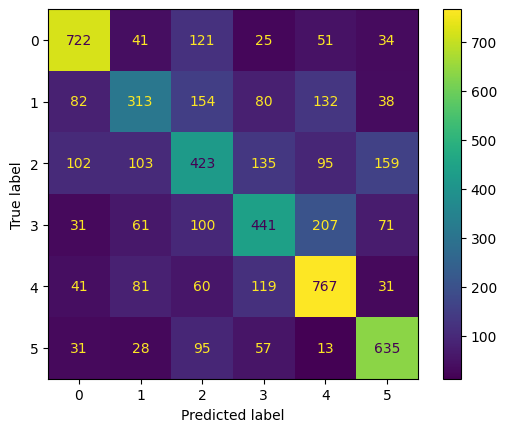

In [45]:
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_rf.classes_)

disp.plot()
plt.show()

In [46]:
# print classification report

print(classification_report(y_test, y_pred_rf))

# slight improvement, drop in misclassifying patients without heart disease

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       994
           1       0.50      0.39      0.44       799
           2       0.44      0.42      0.43      1017
           3       0.51      0.48      0.50       911
           4       0.61      0.70      0.65      1099
           5       0.66      0.74      0.70       859

    accuracy                           0.58      5679
   macro avg       0.57      0.58      0.57      5679
weighted avg       0.57      0.58      0.58      5679



In [48]:
# feature importance plot

feature_importance_plot(clf_rf, X_train_scaled, n = 5) 

# unlike decision tree, where slope was the dominant feature , 
# seeing signs of more features being used to split the nodes

NameError: name 'feature_importance_plot' is not defined